In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

train_dir = '/Train_Folder_out/'
validation_dir = '/Validation_Folder_out/'

img_size = (64, 64)
batch_size = 32
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=img_size,
    batch_size=batch_size,
)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.AveragePooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

test_loss, test_acc = model.evaluate(validation_dataset)
print('Test accuracy:', test_acc)
model.summary()



Found 1200 files belonging to 3 classes.
Found 487 files belonging to 3 classes.
Epoch 1/10
38/38 [==============================] - 5s 115ms/step - loss: 3.5429 - accuracy: 0.8417 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 5s 124ms/step - loss: 4.4665e-05 - accuracy: 1.0000 - val_loss: 2.5337e-05 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 5s 124ms/step - loss: 9.9717e-07 - accuracy: 1.0000 - val_loss: 3.5157e-05 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 5s 123ms/step - loss: 2.0464e-07 - accuracy: 1.0000 - val_loss: 1.5816e-05 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 5s 129ms/step - loss: 1.1712e-07 - accuracy: 1.0000 - val_loss: 1.5094e-05 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 5s 120ms/step - loss: 8.3943e-08 - accuracy: 1.0000 - val_loss: 1.6673e-05 - val_accuracy: 1.0000
Epoch 7/10
38/38 [=========

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

train_dir = '/Train_Folder_out/'
validation_dir = '/Test_Folder_out/'

img_size = (64, 64)
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=img_size,
    batch_size=batch_size,
)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.AveragePooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5", 
    monitor='val_loss', 
    save_best_only=True
)
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)
best_model = tf.keras.models.load_model("best_model.h5")
test_loss, test_acc = best_model.evaluate(validation_dataset)
print('Test accuracy:', test_acc)
best_model.summary()


Found 1200 files belonging to 3 classes.
Found 487 files belonging to 3 classes.
Epoch 1/10
38/38 [==============================] - 6s 129ms/step - loss: 6.3154 - accuracy: 0.8200 - val_loss: 2.4527e-04 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 4s 115ms/step - loss: 4.5654e-04 - accuracy: 1.0000 - val_loss: 2.3805e-05 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 5s 121ms/step - loss: 4.7332e-06 - accuracy: 1.0000 - val_loss: 5.1268e-05 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 5s 121ms/step - loss: 1.8867e-06 - accuracy: 1.0000 - val_loss: 3.5271e-05 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 1s 32ms/step - loss: 2.3805e-05 - accuracy: 1.0000
Test accuracy: 1.0
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 62, 62, 32

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

best_model = tf.keras.models.load_model("best_model.h5")
validation_loss, validation_accuracy = best_model.evaluate(validation_dataset, verbose=2)
print('Validation accuracy:', validation_accuracy)
true_labels = []
predicted_labels = []
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(tf.argmax(best_model.predict(images), axis=-1).numpy())
report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(report)

16/16 - 1s - loss: 2.3805e-05 - accuracy: 1.0000 - 674ms/epoch - 42ms/step
Validation accuracy: 1.0
1/1 [==============================] - 0s 86ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       157

    accuracy                           1.00       487
   macro avg       1.00      1.00      1.00       487
weighted avg       1.00      1.00      1.00       487



1/1 [==============================] - 0s 34ms/step


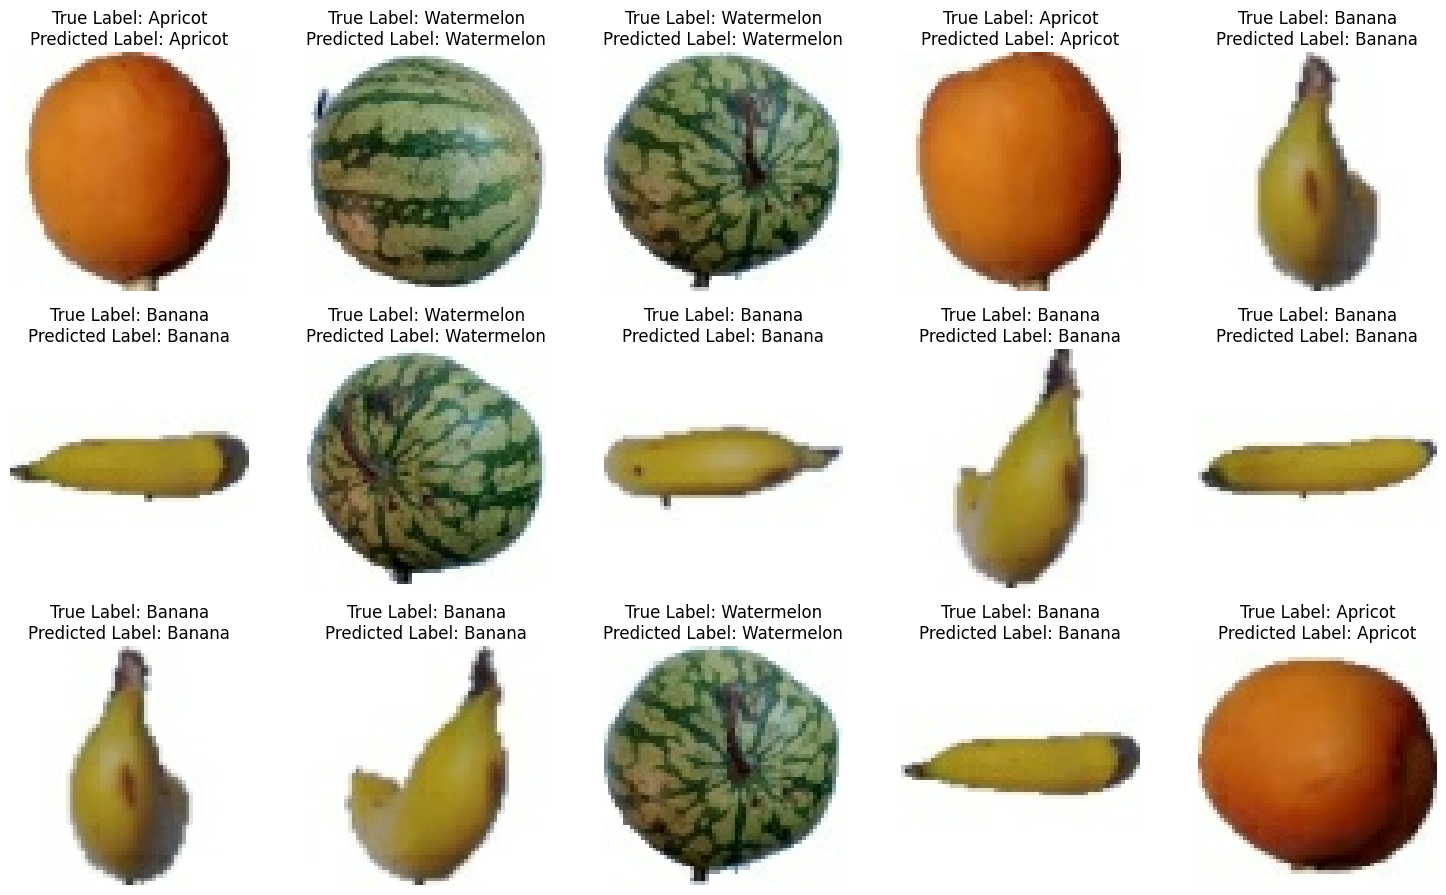

In [26]:
import matplotlib.pyplot as plt
import numpy as np
num_samples = 15
test_images = []
test_labels = []
for images, labels in validation_dataset.take(num_samples):
    test_images.append(images[0])
    test_labels.append(labels[0].numpy())

if len(test_images) < num_samples:
    num_samples = len(test_images)
    print(f"Reduced num_samples to {num_samples} because the dataset contains fewer elements.")

predicted_labels = best_model.predict(np.array(test_images))
predicted_labels = tf.argmax(predicted_labels, axis=-1).numpy()

class_names = train_dataset.class_names
if num_samples > 0:
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(test_images[i].numpy().astype("uint8"))
        true_label = class_names[test_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No samples to plot.")
